## Generic qubit dynamics
For a given pre-jump state $|\psi>$, 
$$ J[|\psi><\psi|]|\varphi_\pm> = \lambda_{\pm}|\varphi_\pm>, $$
where both $\lambda_\pm$ and $|\varphi_\pm>$ depend on $|\psi>$.
Suppose P divisibility, thus $\lambda_-<0$, $\lambda_+>0$. I want an operator $C$ that could cancel out the negativity of $\lambda_-$, without changing the eigenstates $|\varphi_\pm>$.
Let
$$ C = |\tau><\psi|,\qquad |\tau> =\beta|\psi> + \gamma|\varphi_->. $$
Imposing
$$ \left(C|\psi><\psi| + |\psi><\psi|C^\dagger\right)|\varphi_-> = \alpha|\varphi_->, $$
fixes $\gamma = -2<\varphi_-|\psi>Re\beta$, and the new eigenvalue is 
$$ R[|\psi><\psi|]|\varphi_-> = \left(\lambda_- - |<\varphi_-|\psi>|^2Re\beta\right)|\varphi_->, $$
which is positive for
$$ Re\beta \le \frac{\lambda_-}{|<\varphi_-|\psi>|^2}. $$
For this $\beta$, the negative eigenvalue becomes non-negative.
Also, the dimensionality of the Hilbert space does not play any role: it works for any dimension.

Note: this only works as long as $<\varphi_-|\psi>\ne0$.
For a qubit it is quite reasonable: if $<\varphi_-|\psi>=0$, then necessarely $|\varphi_+> = |\psi>$, but this means that at a time $t$, the state can either evolve deterministically $|\psi(t)>\mapsto|\psi(t+dt)>$, reverse-jump $|\psi(t)>\mapsto|\varphi_->$ or remain frozen via the direct jump $|\psi(t)>\mapsto|\varphi_+(t)>=|\psi(t)>$, which would be a rather peculiar beahvior.
For higher dimensional system, this last part is no longer true, the direct-jump eigenstates must not be $|\psi(t)>$ and the subspace orthogonal to $|\psi(t)>$ is way richer, and therefore more likely that $<\varphi_-|\psi(t)>=0$.

But what happens for the other eigenvalue $\lambda_+$?
$$ R[|\psi><\psi|]|\varphi_+> = \left(\lambda_+ + |<\varphi_+|\psi>|^2Re\beta\right)|\varphi_+>, $$
the positive eigenvalue decreases, therefore, chosing the biggest $\beta$ allowed, this method only works as long as
$$\lambda_+ \ge -\lambda_-\frac{|<\varphi_-|\psi>|^2}{|<\varphi_+|\psi>|^2}. $$

### Examples
Eternally non-Markovian

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

def plot (title, label0=r'$tr[\rho(t)\sigma_x]$', label1=r'$tr[\rho(t)\sigma_y]$', label2=r'$tr[\rho(t)\sigma_z]$'):
    filein = open("../params.txt")
    Ncopies = int(filein.readline())
    Nensemble = int(filein.readline())
    ti = float(filein.readline())
    tf = float (filein.readline())
    dt = float(filein.readline())
    print_traj = bool(filein.readline())
    Ntraj = int(filein.readline())
    dimH = int(filein.readline())
    Npoints = int((tf-ti)/dt)

    t = np.arange(ti,tf,dt)

    fig, ax = plt.subplots(1,3, figsize=(15,3), sharey=True)
    for i in range(3):
        trajectories = np.zeros((Ntraj, Npoints))
        exact = np.zeros(Npoints)
        avg_obs = np.zeros(Npoints)
        err_obs = np.zeros(Npoints)
        filein = open("../trajectories_"+str(i+1)+".txt")
        f_exact = open("../analytic_"+str(i+1)+".txt")
        f_avg = open("../average_"+str(i+1)+".txt")
        f_err = open("../error_"+str(i+1)+".txt")
        for k in range(Npoints):
            exact[k] = f_exact.readline()
            avg_obs[k] = f_avg.readline()
            err_obs[k] = f_err.readline()
            j = 0
            line = filein.readline()
            for x in line.split():
                trajectories[j,k] = x
                j+=1
        for itraj in range(Ntraj):
            ax[i].plot(t, trajectories[itraj,:], alpha=.1)
        ax[i].plot(t,exact,color='black', label="Exact")
        ax[i].errorbar(t,avg_obs,err_obs, marker='o', markersize=3, color='red', label="Average", errorevery=50, markevery=50, linewidth=0, elinewidth=1)

        ax[i].legend(loc="lower right")
        ax[i].set_xlabel(r'$t$')

    ax[0].set_ylabel(label0)
    ax[1].set_ylabel(label1)
    ax[2].set_ylabel(label2)
    plt.suptitle(title)

    plt.show();

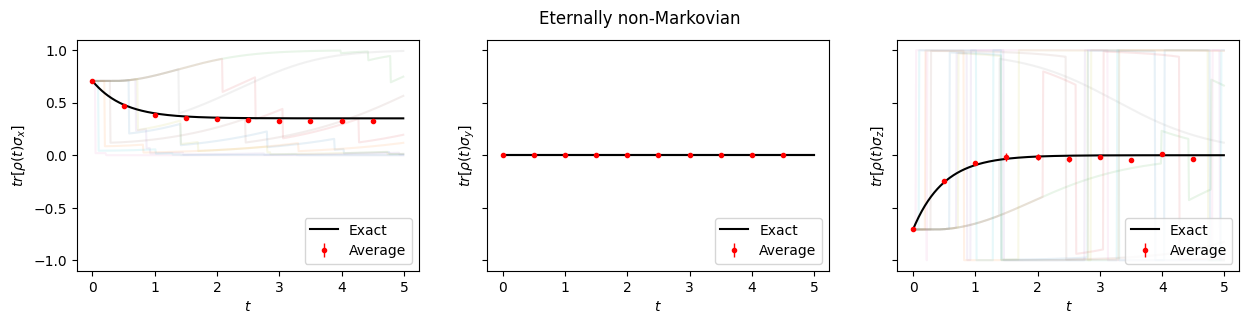

In [3]:
plot("Eternally non-Markovian")

### Fixing the post-jump states
Now, this method has two drawbacks.
First, it requires us to calculate the eigenvalues of $R$ at each time and for each state, also when it evolves deterministically, and not just when a jump happens.
The second problem is that the jumps are to the eigenstates of $R$, which in general depend on time and therefore the effective ensemble is infinite-dimensional.

This problem can be solved applying another $C_0$ before this one. This first $C_0$ has the only effect of changing the post-jump states, fixing them, for example, to $|g>$ and $|e>$, without enforcing the positivity of the eigenvalues.
After $C_0$, the $C$ described previously is applied, not changing the eigenstates but only enforcing  the positivity of the eigenvalues.
Let
$$
  \rho = \begin{pmatrix}1-c^2 & c \sqrt{1-c^2} e^{i\phi}\\ c \sqrt{1-c^2} e^{-i\phi} & c^2\end{pmatrix},\qquad
  J[|psi><\psi|] = \begin{pmatrix} r_{11} & r_{12} e^{i\theta}\\ r_{12}e^{-i\theta} & r_{22}\end{pmatrix}.
$$
By setting the off-diagonal elements of $R = J+\frac12(C_0|psi><\psi|+|psi><\psi|C_0^\dagger)$ equal to zero, one possible solution is given by
$$
  C_0 = \begin{pmatrix}-\frac{2 r_{12}}{c\sqrt{1-c^2}}\frac{\sin\theta}{\sin\phi} & 0\\
  \frac{2 r_{12}}{1-c^2}\frac{\sin(\theta-\phi)}{\sin\phi} & 0\end{pmatrix}. 
$$

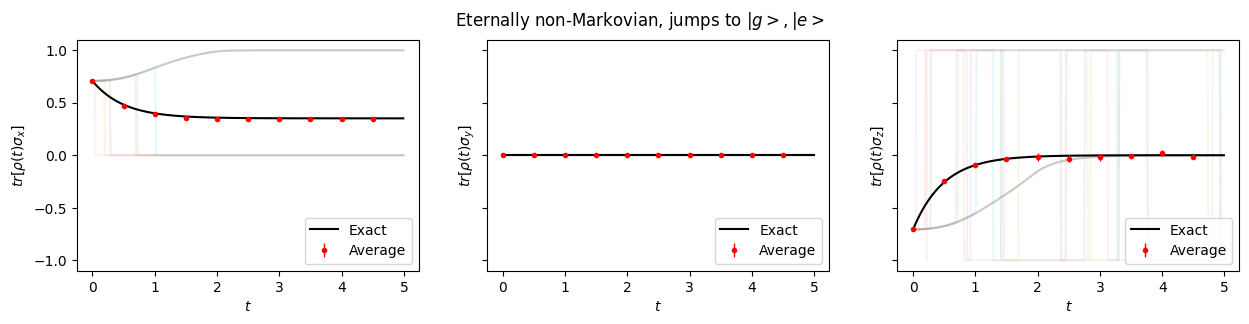

In [3]:
plot("Eternally non-Markovian, jumps to $|g>,|e>$")